In [2]:
# %matplotlib inline
import pandas as pd

### Connect Pandas to the database with this URL: 

In [19]:
base = '~/Documents/Lighthouse-lab/lighthouse-data-notes/Week_2/w2-d2/pandas_exercises/imdb_pandas/'
file = 'titles.csv'
rel = './imdb_pandas/'
#titles = pd.read_csv(base + file) # absolute path
titles = pd.read_csv(rel + file) # relative path use the forward slash
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [21]:
file = 'cast.csv'
cast = pd.read_csv(base + file)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### How many movies are listed in the titles dataframe?

In [35]:
titles.shape[0]
#titles.index

232330

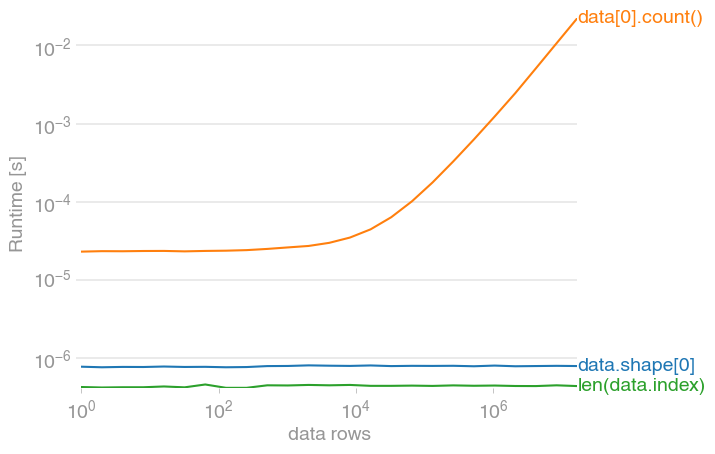

In [ ]:
#print(df[(df.animal.isin(['catt0'])) & (df.age < 3)])

In [32]:
#help(pd.DataFrame.count)
#dir(pd.DataFrame)

### What are the earliest two films listed in the titles dataframe?

In [45]:
(titles.sort_values('year')).head(1)
#temp.head(1)

,title,year
177757,Miss Jerry,1894


### How many movies have the title "Hamlet"?

In [70]:
hamlet = titles.loc[titles['title'].isin(['Hamlet'])] # returns all of rows name Hamlet
hamlet.shape[0]


18

### How many movies are titled "North by Northwest"?

In [69]:
(titles.loc[titles['title'].isin(['North by Northwest'])]).shape[0]

1

### When was the first movie titled "Hamlet" made?

In [71]:
hamlet.head(1)

,title,year
6009,Hamlet,1948


### List all of the "Treasure Island" movies from earliest to most recent.

In [73]:
(titles.loc[titles['title'].isin(['Treasure Island'])])

,title,year
51287,Treasure Island,1920
89534,Treasure Island,1972
96934,Treasure Island,1950
111343,Treasure Island,1973
179354,Treasure Island,1999
191050,Treasure Island,1934
205397,Treasure Island,1985
206027,Treasure Island,1918


### How many movies were made in the year 1950?

In [81]:
titles[titles['year'].eq(1950)].shape[0]

1099

### How many movies were made in the year 1960?

In [82]:
titles[titles['year'].eq(1960)].shape[0]

1501

### How many movies were made from 1950 through 1959?

In [89]:
titles[titles['year'].between(1950,1959)].shape[0] #between operator is super powerful

12711

### In what years has a movie titled "Batman" been released?

In [91]:
titles[titles['title'].isin(['Batman'])] # assuming there are no wildcards

,title,year
56000,Batman,1989
74608,Batman,1943


### How many roles were there in the movie "Inception"?

In [104]:
cast[cast['title'].isin(['Inception'])]['n'].sum(axis=0)

1326.0

In [105]:
cast[cast['title'].isin(['Inception'])].sum(axis=0)

title        InceptionInceptionInceptionInceptionInceptionI...
year                                                    154770
name         Michael (III) AugustPeter BashamTom BerengerKe...
type         actoractoractoractoractoractoractoractoractora...
character    LAX PassengerFischer's Jet CaptainBrowningMomb...
n                                                         1326
dtype: object

In [92]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [106]:
#help(pd.DataFrame.sum)

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [125]:
#df['your column name'].isnull().sum()
print((cast[cast['title'].isin(['Inception'])]).isnull().sum(),'\n')

# clunky way to do things
'''
i_nan = (cast[cast['title'].isin(['Inception'])]).shape[0]
i_nonan = (cast[cast['title'].isin(['Inception'])].dropna()).shape[0]
i_nan - i_nonan
'''
print((cast[cast['title'].isin(['Inception'])]['n']).isnull().sum())

title         0
year          0
name          0
type          0
character     0
n            26
dtype: int64 

26


### But how many roles in the movie "Inception" did receive an "n" value?

In [135]:
print(cast[cast['title'].isin(['Inception'])], '\n')
print(cast[cast['title'].isin(['Inception'])].notnull().sum(),'\n')
print(cast[cast['title'].isin(['Inception'])]['n'].notnull().sum(),'\n')

             title  year                  name     type  \
94937    Inception  2010  Michael (III) August    actor   
144039   Inception  2010          Peter Basham    actor   
177911   Inception  2010          Tom Berenger    actor   
191432   Inception  2010              Ken Bhan    actor   
251777   Inception  2010        Virgile Bramly    actor   
...            ...   ...                   ...      ...   
3259597  Inception  2010            Ellen Page  actress   
3313720  Inception  2010        Nicole Pulliam  actress   
3340319  Inception  2010    Lisa (II) Reynolds  actress   
3347057  Inception  2010         Talulah Riley  actress   
3582980  Inception  2010        Shannon Welles  actress   

                     character     n  
94937            LAX Passenger   NaN  
144039   Fischer's Jet Captain  44.0  
177911                Browning   8.0  
191432        Mombasan Gambler   NaN  
251777          Bridge Sub Con  29.0  
...                        ...   ...  
3259597           

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [156]:
#assuming ascending
nbn = cast[cast['title'].isin(['North by Northwest'])].dropna() # drop any NaN record
nbn.sort_values(by='n')
#cast[cast['title'].isin(['North by Northwest'])].dropna().sort_values(by='n') # example of chaining

,title,year,name,type,character,n
845516,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
3382934,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
1413409,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
3043261,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
345822,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
2941468,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
1644542,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
1236791,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
2372617,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
1757154,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

### multiindexes

In [183]:
cast_multi_ind = cast.set_index(['title','year']).sort_index(level=[0,1]) # can be done in multiple steps
cast_multi_ind.tail() #

name     type       character   n
title year                                                      
y     2016         Rahul (VII) Nair    actor           Binoy NaN
      2016             Anoop Ramesh    actor             Pop NaN
      2016  Abhiram Suresh Unnithan    actor          Shaiju NaN
      2016        Santhosh Varghese    actor  Police Officer NaN
      2016            Lydia (XXIII)  actress   News Reporter NaN

In [184]:
cast_multi_ind.loc[('Sleuth',1972)] # PAY ATTENTION TO THE DATATYPES

name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [185]:
cast.index

RangeIndex(start=0, stop=3634467, step=1)

In [186]:
cast.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [187]:
cast_multi_ind.loc[('Sleuth',2007)]

name     type          character    n
title  year                                                      
Sleuth 2007      Kenneth Branagh    actor  Other Man on T.V.  NaN
       2007        Michael Caine    actor             Andrew  1.0
       2007  Alec (II) Cawthorne    actor  Inspector Doppler  NaN
       2007             Jude Law    actor               Milo  2.0
       2007        Harold Pinter    actor        Man on T.V.  3.0
       2007    Eve (II) Channing  actress    Marguerite Wyke  NaN
       2007    Carmel O'Sullivan  actress             Maggie  NaN

### How many roles were credited in the silent 1921 version of Hamlet?

In [192]:
print(cast_multi_ind.loc[('Hamlet',1921)],'\n')
cast_multi_ind.loc[('Hamlet',1921)].shape[0]

                               name     type         character    n
title  year                                                        
Hamlet 1921        Fritz Achterberg    actor       Fortinbras,  9.0
       1921            Paul Conradi    actor      K?nig Hamlet  2.0
       1921        Anton De Verdier    actor           Laertes  7.0
       1921         Hans Junkermann    actor          Polonius  6.0
       1921            Heinz Stieda    actor           Horatio  5.0
       1921  Eduard von Winterstein    actor          Claudius  4.0
       1921         Mathilde Brandt  actress  K?nigin Gertrude  3.0
       1921          Lilly Jacobson  actress           Ophelia  8.0
       1921            Asta Nielsen  actress            Hamlet  1.0 



9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [194]:
cast_multi_ind.loc[('Hamlet',1996)].shape[0]

54

### How many "Hamlet" roles have been listed in all film credits through history?

In [195]:
cast_multi_ind.loc[('Hamlet')].shape[0]

313

### How many people have played an "Ophelia"?

In [210]:
cast[cast['character'].isin(['Ophelia'])]

,title,year,name,type,character,n
240366,The Merry Maids of Madness,2016,Amy Bourque,actor,Ophelia,11.0
397692,Jake Gets Paid,2009,Josie Chisholm,actor,Ophelia,NaN
456673,Inoperable,2016,Crystal Cordero,actor,Ophelia,NaN
840572,"Dogg's Hamlet, Cahoot's Macbeth",2005,Lucas Grabeel,actor,Ophelia,NaN
1323306,11,2014,Catherine (IV) Lord,actor,Ophelia,NaN
...,...,...,...,...,...,...
3561046,"Hamlet, Son of a Kingpin",2015,Ingrid Vollset,actress,Ophelia,NaN
3574490,D.C. Cab,1983,Marsha Warfield,actress,Ophelia,7.0
3575192,Creature,2011,Jennifer Lynn Warren,actress,Ophelia,12.0
3585205,Hamlet,2015,Katie (II) West,actress,Ophelia,7.0


In [211]:
cast[cast['character'].isin(['Ophelia'])].shape[0]

111

### How many people have played a role called "The Dude"?

In [212]:
cast[cast['character'].isin(['The Dude'])].shape[0]

18

### How many people have played a role called "The Stranger"?

In [213]:
cast[cast['character'].isin(['The Stranger'])].shape[0]

212

### How many roles has Sidney Poitier played throughout his career?

In [214]:
cast[cast['name'].isin(['Sidney Poitier'])].shape[0]

43

### How many roles has Judi Dench played?

In [215]:
cast[cast['name'].isin(['Judi Dench'])].shape[0]

54

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

Creating a multi index everytime is not always the right answer but it produces highly repeatable data

In [221]:
cast_r_multi_ind = cast.set_index(['year','name','n']).sort_index(level=[0,1]) # can be done in multiple steps
cast_r_multi_ind.tail() #

title     type    character
year name            n                                     
2023 Victoria Alcala NaN    Inside Me  actress         Rosa
                     NaN    Inside Me  actress      Loretta
2025 Ewan Fleck      NaN  Rise of Man    actor         Jack
     Yassin Alnaimi  NaN  Rise of Man    actor         Mark
2026 Yassin Alnaimi  NaN  War in Snow    actor  Abdalrehman

In [237]:
cast_r_multi_ind.loc[(1940,['Cary Grant','Victoria Alcala'],2)] # works with lists !!!

,,,title,type,character
year,name,n,,,
1940,Cary Grant,2.0,My Favorite Wife,actor,Nick Arden


In [239]:
cast_r_multi_ind.loc[(1940,'Cary Grant',2)]

,,,title,type,character
year,name,n,,,
1940,Cary Grant,2.0,My Favorite Wife,actor,Nick Arden


In [240]:
cast_r_multi_ind.loc[(range(1920,1980),'Cary Grant',2)] # WORKS FOR RANGES

title   type                  character
year name       n                                                            
1932 Cary Grant 2.0        Madame Butterfly  actor  Lieutenant B.F. Pinkerton
1933 Cary Grant 2.0            I'm No Angel  actor               Jack Clayton
                2.0      She Done Him Wrong  actor           Captain Cummings
                2.0  The Eagle and the Hawk  actor              Henry Crocker
                2.0       The Woman Accused  actor             Jeffrey Baxter
1934 Cary Grant 2.0          Born to Be Bad  actor             Malcolm Trevor
                2.0     Thirty Day Princess  actor         Porter Madison III
1935 Cary Grant 2.0           Enter Madame!  actor          Gerald Fitzgerald
                2.0         Sylvia Scarlett  actor              Jimmy Monkley
                2.0       Wings in the Dark  actor                 Ken Gordon
1936 Cary Grant 2.0         Wedding Present  actor              Charlie Mason
1937 Cary Grant 2.0         The Awful Truth  actor             Jerry Warriner
                2.0   The Toast of New York  actor                  Nick Boyd
                2.0                  Topper  actor               George Kerby
                2.0     When You're in Love  actor               Jimmy Hudson
1938 Cary Grant 2.0        Bringing Up Baby  actor                      David
                2.0                 Holiday  actor                Johnny Case
1939 Cary Grant 2.0            In Name Only  actor                Alec Walker
1940 Cary Grant 2.0        My Favorite Wife  actor                 Nick Arden
1941 Cary Grant 2.0          Penny Serenade  actor                Roger Adams

In [241]:
cast_r_multi_ind.loc[(range(1920,1980),'Cary Grant',range(1,8))] 

title   type                  character
year name       n                                                          
1932 Cary Grant 1.0          Hot Saturday  actor            Romer Sheffield
                2.0      Madame Butterfly  actor  Lieutenant B.F. Pinkerton
                3.0          Blonde Venus  actor              Nick Townsend
                4.0    Devil and the Deep  actor                Lt. Jaeckel
                5.0     This Is the Night  actor          Stephen Mathewson
...                                   ...    ...                        ...
1960 Cary Grant 1.0  The Grass Is Greener  actor        Victor Rhyall, Earl
1962 Cary Grant 1.0    That Touch of Mink  actor              Philip Shayne
1963 Cary Grant 1.0               Charade  actor               Peter Joshua
1964 Cary Grant 1.0          Father Goose  actor                     Walter
1966 Cary Grant 1.0        Walk Don't Run  actor        Sir William Rutland

[70 rows x 3 columns]

### List the leading roles that Cary Grant played in the 1940s in order by year.

In [236]:
cast.loc[(cast['name'].isin(['Cary Grant']) & cast['year'].isin(['1940']) &  cast['n'].isin([1]))]


,title,year,name,type,character,n
845495,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
845539,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
845541,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0


In [243]:
cast['n'].max()

33613.0

### How many roles were available for actors in the 1950s?

In [246]:
cast.loc[(cast['type'].isin(['actor']) & cast['year'].isin(['1950']))].shape[0] 


16598

### How many roles were avilable for actresses in the 1950s?

In [248]:
cast.loc[(cast['type'].isin(['actress']) & cast['year'].isin(['1950']))].shape[0] 

5545

### How many leading roles (n=1) were available from the beginning of film history through 1980?

In [251]:
cast.loc[(cast['year'].between(1800,1980) & cast['n'].isin([1]))].shape[0] # works for numeric values way out of range

64095

In [ ]:
titles[titles['year'].between(1950,1959)].shape[0] #between operator is super powerful

### How many non-leading roles were available through from the beginning of film history through 1980?

In [252]:
cast.loc[(cast['year'].between(1800,1980) & ~cast['n'].isin([1]))].shape[0] # the NOT operator (~)

1097484

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?

In [256]:
cast.loc[(cast['year'].between(1800,1980) & cast['n'].isnull())].shape[0]

439134